<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

Import Data & Add Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

from sklearn.model_selection import train_test_split


data = pd.read_csv('telecom_churn_data.csv')
df = pd.DataFrame(data)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Let's take a look at what we're working with.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

Let's keep area code and drop phone number. We can one-hot encode area code, however the phone numbers are high cardinality data and for our purposes they give a lot more detail (and require a lot more bandwidth) than we would like to work with.

Those are the only objects other than state. We'll one-hot encode state also.

Our target is churn, which is in boolean format.

Looks great. Next we'll explore and clean the data if need be. 



In [3]:
df.isnull().values.any()

False

Great! Looks like there aren't any null values.

Let's go ahead and drop the rows we aren't going to be using for this analysis.

In [4]:
# Feature to drop
drop = ['phone number']
# Drop feature
df = df.drop(drop,axis=1)

In [5]:
# Summary Statistics
df.describe().round()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0
mean,101.0,437.0,8.0,180.0,100.0,31.0,201.0,100.0,17.0,201.0,100.0,9.0,10.0,4.0,3.0,2.0
std,40.0,42.0,14.0,54.0,20.0,9.0,51.0,20.0,4.0,51.0,20.0,2.0,3.0,2.0,1.0,1.0
min,1.0,408.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,33.0,1.0,0.0,0.0,0.0,0.0
25%,74.0,408.0,0.0,144.0,87.0,24.0,167.0,87.0,14.0,167.0,87.0,8.0,8.0,3.0,2.0,1.0
50%,101.0,415.0,0.0,179.0,101.0,30.0,201.0,100.0,17.0,201.0,100.0,9.0,10.0,4.0,3.0,1.0
75%,127.0,510.0,20.0,216.0,114.0,37.0,235.0,114.0,20.0,235.0,113.0,11.0,12.0,6.0,3.0,2.0
max,243.0,510.0,51.0,351.0,165.0,60.0,364.0,170.0,31.0,395.0,175.0,18.0,20.0,20.0,5.0,9.0


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared


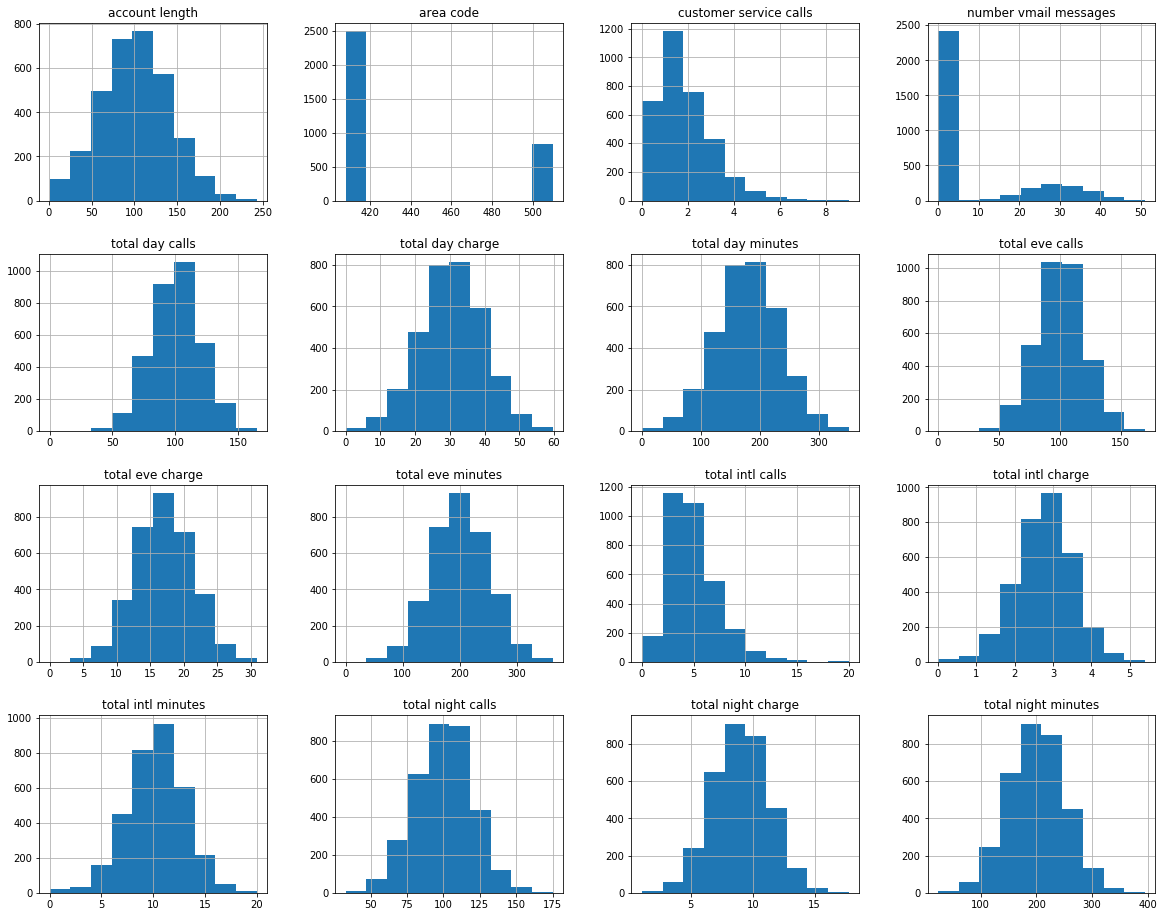

In [6]:
# Define which features are intergers/floats for histograms
hist_cols = ['account length',
             'area code',
             'number vmail messages',
             'total day minutes',
             'total day calls',
             'total day charge',
             'total eve minutes',
             'total eve calls',
             'total eve charge',
             'total night minutes',
             'total night calls',
             'total night charge',
             'total intl minutes',
             'total intl calls',
             'total intl charge',
             'customer service calls']

# Define figure size & axis
fig,ax = plt.subplots(figsize = (20,16))
# Plot histograms
df.hist(column=hist_cols,ax=ax);

Some of these features are skewed, e.g. customer service calls, international calls and international charges. 

We can see some of these appear to be directly correlated, which makes sense such as calls, charges and minutes. E.g. total day calls, charges, and minutes, international calls, charges and minutes, and night calls, charges and minutes. 

Since ensemble methods work best when predictors are as independent as possible, we will probably just keep one of each of the three when creating our ensemble.

Number of voicemail messages appears to be bimodal. 

Let's take a look at the features that are non-continuous objects. 

States

In [7]:
df.state.describe()

count     3333
unique      51
top         WV
freq       106
Name: state, dtype: object

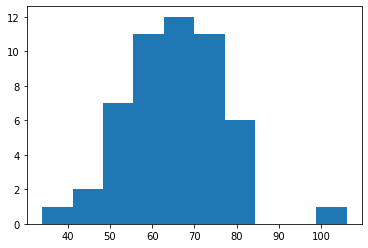

In [8]:
plt.hist(df.state.value_counts());

It looks like all states are represented, some more than others with West Virginia being the max. 

In [31]:
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

Churn

Let's explore our target variable, churn. 

In [9]:
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [10]:
df.churn.value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

We can see there is a class imbalance here, so we'll want to address that by balancing the classes. 

One-hot-encode the categorical data

In [11]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,0,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,0,1,0


Separate predictor and target variables

In [12]:
# Define X and y variables
y = df['churn']
X = df.drop(['churn'], axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

Normalize

In [13]:
# Min-max scale
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
X_train_transformed = scale.fit_transform(X_train)
X_test_transformed = scale.transform(X_test)

Let's start modeling...

Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

logreg = LogisticRegression(fit_intercept=False, class_weight='balanced', C=1e20, solver='liblinear')
logreg.fit(X_train, y_train)

# Predict
y_hat_test = logreg.predict(X_test)

y_score = logreg.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
print(f"Test Set AUC: {auc(fpr, tpr)}")

Test Set AUC: 0.8101190476190476


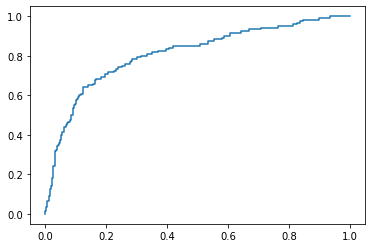

In [33]:
plt.plot(fpr,tpr);

In [15]:
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_hat_test)}")

Confusion Matrix: 
 [[536 178]
 [ 31  89]]


In [16]:
print(f"Classification Report: \n\n {classification_report(y_test, y_hat_test)}")

Classification Report: 

               precision    recall  f1-score   support

       False       0.95      0.75      0.84       714
        True       0.33      0.74      0.46       120

    accuracy                           0.75       834
   macro avg       0.64      0.75      0.65       834
weighted avg       0.86      0.75      0.78       834



Voting Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(max_iter=10000,fit_intercept=False, class_weight='balanced', C=1e20, solver='liblinear')
rnd_clf = RandomForestClassifier(class_weight='balanced')
svm_clf = SVC(class_weight='balanced')

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf),('rf', rnd_clf),('svc', svm_clf)],
    voting='hard')

voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1e+20,
                                                 class_weight='balanced',
                                                 dual=False,
                                                 fit_intercept=False,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=10000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
    

In [25]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.749400479616307
RandomForestClassifier 0.9304556354916067
SVC 0.8309352517985612
VotingClassifier 0.8968824940047961


In [69]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(class_weight='balanced'), 
    n_estimators=100,
    max_samples=100, 
    bootstrap=True)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.8908872901678657

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.88      1.00      0.93       714
        True       0.95      0.17      0.30       120

    accuracy                           0.88       834
   macro avg       0.92      0.59      0.62       834
weighted avg       0.89      0.88      0.84       834



In [74]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(class_weight='balanced',splitter='random', max_leaf_nodes=16), 
    n_estimators=5000,
    max_samples=100, 
    bootstrap=True)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.8812949640287769

In [66]:
rnd_clf = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=500,
    max_leaf_nodes=65,
    n_jobs=-1)

rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

accuracy_score(y_test, y_pred_rf)

0.9520383693045563

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.88      1.00      0.93       714
        True       0.95      0.17      0.30       120

    accuracy                           0.88       834
   macro avg       0.92      0.59      0.62       834
weighted avg       0.89      0.88      0.84       834



Classifiers w/Pipeline

Logistic Regression

In [ ]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('log_clf', LogisticRegressionClassifier())
])

parameters = {
    'scaler__with_mean': [True, False]
    'clf__kernel': ['linear', 'rbf'],
    'clf__C':[1, 10]
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('dtr_clf', DecisionTreeClassifier(class_weight='balanced'))
])

parameters = {
    'scaler__with_mean': [True, False]
    'clf__kernel': ['linear', 'rbf'],
    'clf__C':[1, 10]
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

Random Forest

In [ ]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('rnd_clf', RandomForestClassifier())
])

parameters = {
    'scaler__with_mean': [True, False]
    'clf__kernel': ['linear', 'rbf'],
    'clf__C':[1, 10]
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

SVC

In [ ]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svm_clf', SVC())
])

parameters = {
    'scaler__with_mean': [True, False]
    'clf__kernel': ['linear', 'rbf'],
    'clf__C':[1, 10]
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)